Predict the fuel consumption of a vehicle based on their make, engine size, fuel type, no. of cylinders etc.
    
Hypothesis based EDA:

Which brand (or make) has more share of vehicles with less than 8.0 fuel consumption?

Plot the correlation scatter plot for the engine size and fuel consumption.

Create a pairplot with all the numerical variables and note down the observations/insights

Create a new column named “Transmission type” from the TRANSMISSION column by separating out the gears from the alphabets. (Hint: use regex)

Build Linear regression model with only the numerical features using Statsmodels library. Note down the R2, Adjusted R2. 

One-hot encode categorical variables and Build Linear regression model using Statsmodels library. Note down the R2, Adjusted R2. Compare it with the previous mode

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

In [5]:
Fuel_Consumption_path = "Fuel_Consumption_2000-2022.csv"
df = pd.read_csv(Fuel_Consumption_path)

In [6]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [7]:
df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [9]:
df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [13]:
df.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [18]:
df.duplicated().sum()

1

In [20]:
df = df.drop_duplicates()

In [23]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22555 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   YEAR              22555 non-null  int64   
 1   MAKE              22555 non-null  category
 2   MODEL             22555 non-null  category
 3   VEHICLE CLASS     22555 non-null  category
 4   ENGINE SIZE       22555 non-null  float64 
 5   CYLINDERS         22555 non-null  int64   
 6   TRANSMISSION      22555 non-null  category
 7   FUEL              22555 non-null  category
 8   FUEL CONSUMPTION  22555 non-null  float64 
 9   HWY (L/100 km)    22555 non-null  float64 
 10  COMB (L/100 km)   22555 non-null  float64 
 11  COMB (mpg)        22555 non-null  int64   
 12  EMISSIONS         22555 non-null  int64   
dtypes: category(5), float64(4), int64(4)
memory usage: 1.8 MB


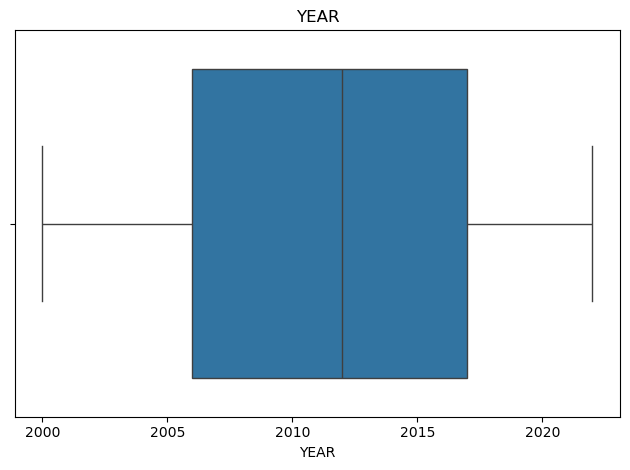

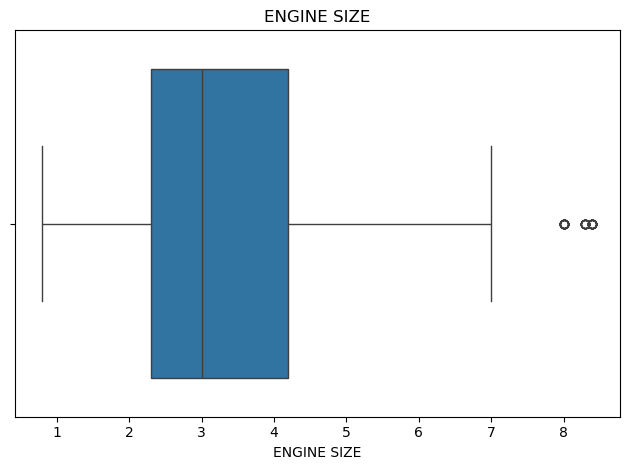

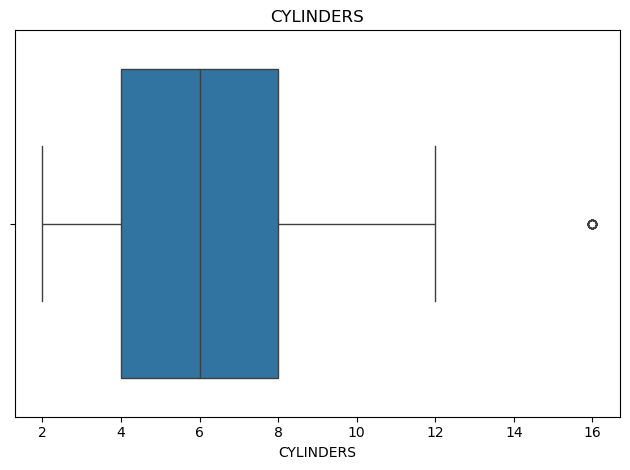

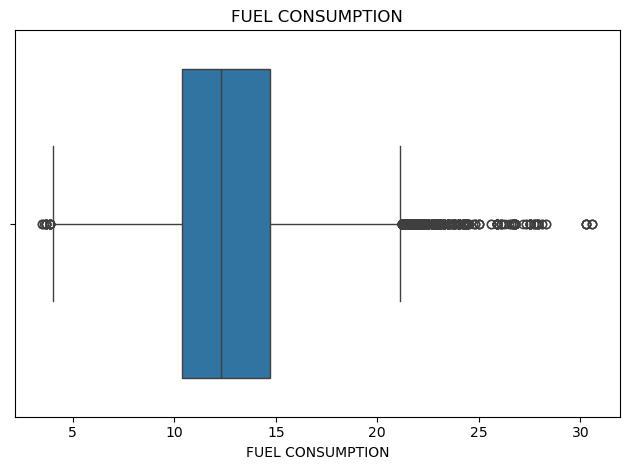

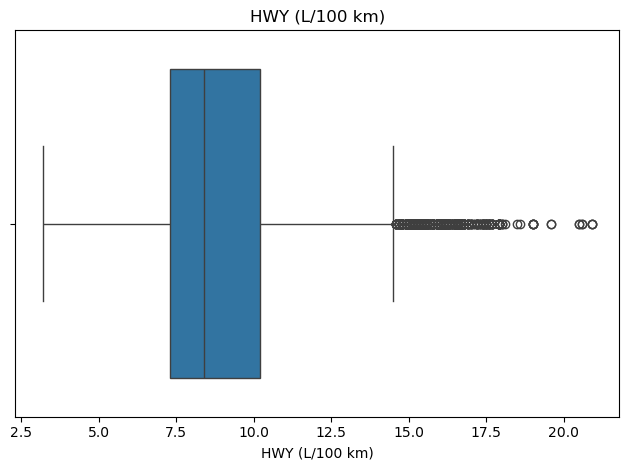

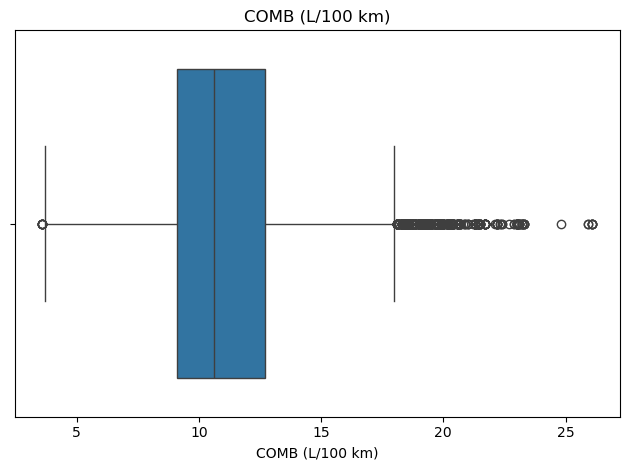

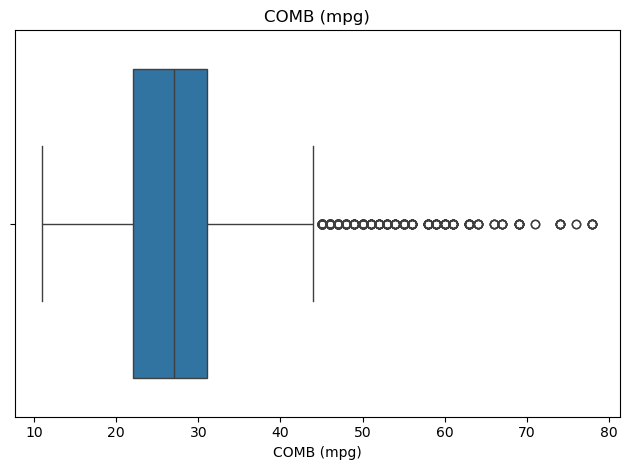

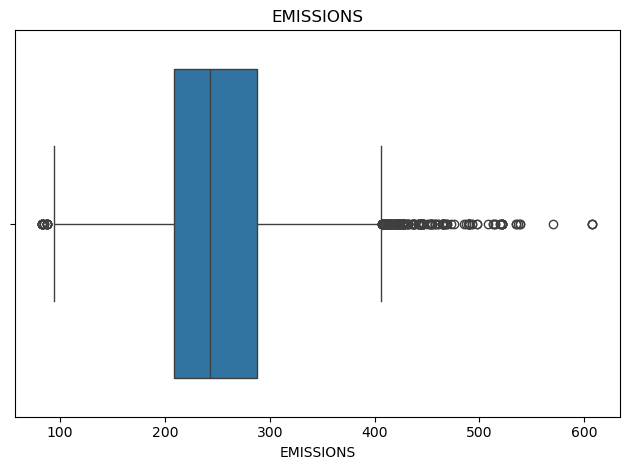

In [48]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [42]:
df[num_cols].corr()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
YEAR,1.000000,-0.077749,-0.072518,-0.098528,-0.007337,-0.067906,0.079895,-0.047733
ENGINE SIZE,-0.077749,1.000000,0.913385,0.821615,0.749409,0.807329,-0.755006,0.821308
CYLINDERS,-0.072518,0.913385,1.000000,0.794928,0.698321,0.771571,-0.714196,0.802164
FUEL CONSUMPTION,-0.098528,0.821615,0.794928,1.000000,0.942347,0.992959,-0.921355,0.919094
HWY (L/100 km),-0.007337,0.749409,0.698321,0.942347,1.000000,0.975012,-0.884736,0.894767
COMB (L/100 km),-0.067906,0.807329,0.771571,0.992959,0.975012,1.000000,-0.920909,0.922975
COMB (mpg),0.079895,-0.755006,-0.714196,-0.921355,-0.884736,-0.920909,1.000000,-0.901839
EMISSIONS,-0.047733,0.821308,0.802164,0.919094,0.894767,0.922975,-0.901839,1.000000


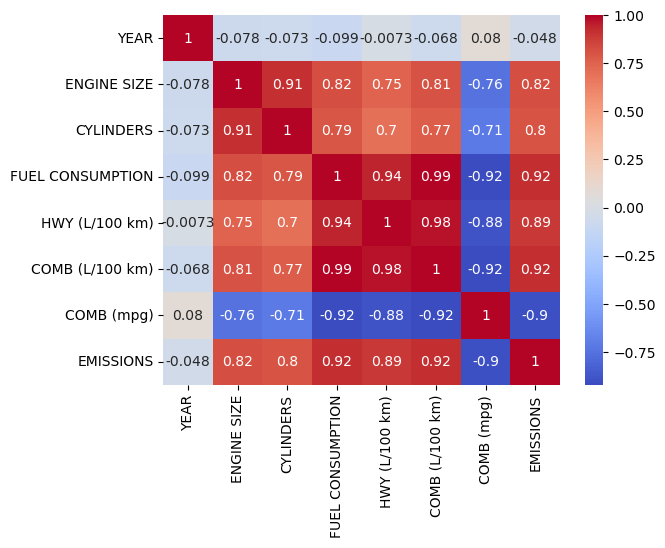

In [45]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22555 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   YEAR              22555 non-null  int64   
 1   MAKE              22555 non-null  category
 2   MODEL             22555 non-null  category
 3   VEHICLE CLASS     22555 non-null  category
 4   ENGINE SIZE       22555 non-null  float64 
 5   CYLINDERS         22555 non-null  int64   
 6   TRANSMISSION      22555 non-null  category
 7   FUEL              22555 non-null  category
 8   FUEL CONSUMPTION  22555 non-null  float64 
 9   HWY (L/100 km)    22555 non-null  float64 
 10  COMB (L/100 km)   22555 non-null  float64 
 11  COMB (mpg)        22555 non-null  int64   
 12  EMISSIONS         22555 non-null  int64   
dtypes: category(5), float64(4), int64(4)
memory usage: 1.8 MB


<Figure size 640x480 with 0 Axes>

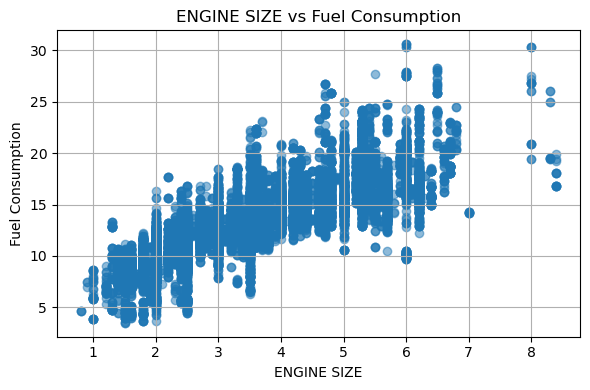

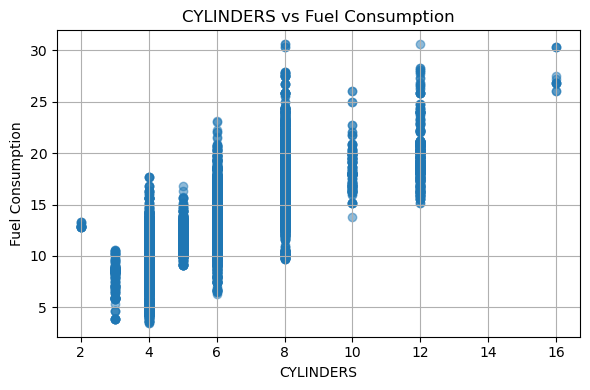

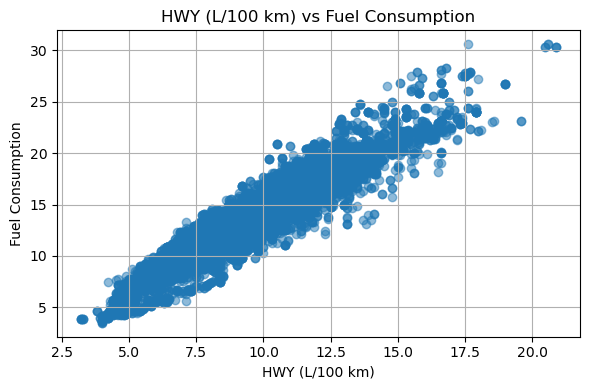

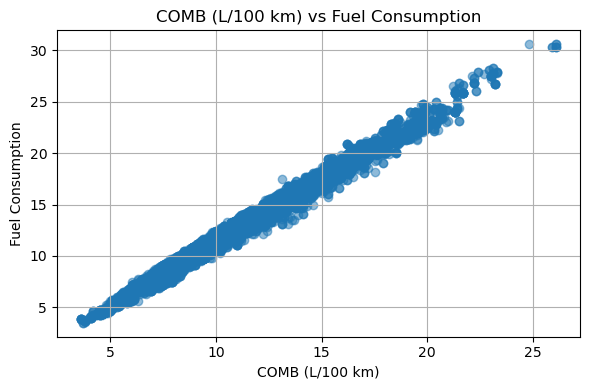

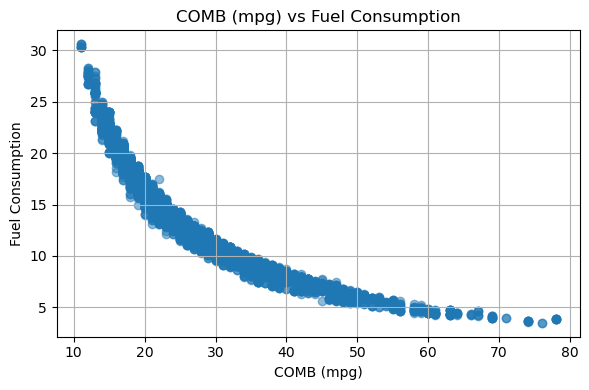

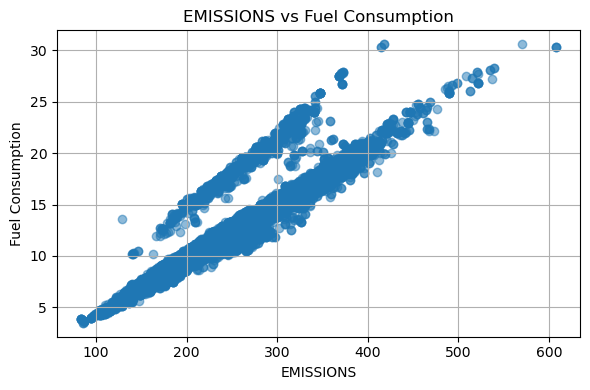

In [81]:
x = df.drop(columns="FUEL CONSUMPTION", axis = 1)
y = df["FUEL CONSUMPTION"]

figure(figsize=(8,6), dpi=80)

nc = num_cols
nc = nc.tolist()
nc.remove("YEAR")
nc.remove("FUEL CONSUMPTION")

for col in nc:
    plt.figure(figsize=(6, 4))
    plt.scatter(x[col], y, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Fuel Consumption")
    plt.title(f"{col} vs Fuel Consumption")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[nc]

X_vif = add_constant(X)
vif_df = pd.DataFrame()

vif_df['Feature'] = X_vif.columns

vif_df['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_df)




           Feature         VIF
0            const  454.963493
1      ENGINE SIZE    7.219153
2        CYLINDERS    7.078864
3   HWY (L/100 km)   25.015212
4  COMB (L/100 km)   40.690248
5       COMB (mpg)    7.954059
6        EMISSIONS    9.306312


In [83]:
print(nc)

['ENGINE SIZE', 'CYLINDERS', 'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']
